In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import listdir, path 

In [45]:
alg_output_folders = {
  "SPMST": "output_data-SPMST_ver3",
  "RSPH": "output_data-RandomSPH_ver1",
  "SPGA": "output_data-SPGA_ver1"
}
df = pd.DataFrame
for alg in alg_output_folders:
  for instype_csv in listdir(alg_output_folders[alg]):
    if instype_csv[-4:] == ".csv":
      tmp = pd.read_csv(alg_output_folders[alg] + "\\" + instype_csv)
      if df.empty:
        df = tmp
      else:
        df = df.append(tmp)
df

,Algorithm,Type,Instance,Seed,BF,Rs
0,SPMST,Type_1_Large,100rat783,0,44220,3.446202
1,SPMST,Type_1_Large,100rat783,1,44220,3.586315
2,SPMST,Type_1_Large,100rat783,2,44220,3.845333
3,SPMST,Type_1_Large,100rat783,3,44220,3.516564
4,SPMST,Type_1_Large,100rat783,4,44220,3.896075
...,...,...,...,...,...,...
445,SPGA,Type_1_Small,75lin105,25,1386,25.988790
446,SPGA,Type_1_Small,75lin105,26,1386,23.460882
447,SPGA,Type_1_Small,75lin105,27,1386,24.816892
448,SPGA,Type_1_Small,75lin105,28,1386,25.698840


In [46]:
best = {}
for insname in df.Instance.unique():
  best[insname] = min(df.BF[insname == df.Instance])

df['Best'] = [best[row.Instance] for index, row in df.iterrows()]
df['RPD'] = (df['BF'] - df['Best']) * 100 / df['Best']
df.dropna(subset=["RPD"], inplace=True)
df

,Algorithm,Type,Instance,Seed,BF,Rs,Best,RPD
0,SPMST,Type_1_Large,100rat783,0,44220,3.446202,44220,0.0
1,SPMST,Type_1_Large,100rat783,1,44220,3.586315,44220,0.0
2,SPMST,Type_1_Large,100rat783,2,44220,3.845333,44220,0.0
3,SPMST,Type_1_Large,100rat783,3,44220,3.516564,44220,0.0
4,SPMST,Type_1_Large,100rat783,4,44220,3.896075,44220,0.0
...,...,...,...,...,...,...,...,...
445,SPGA,Type_1_Small,75lin105,25,1386,25.988790,1386,0.0
446,SPGA,Type_1_Small,75lin105,26,1386,23.460882,1386,0.0
447,SPGA,Type_1_Small,75lin105,27,1386,24.816892,1386,0.0
448,SPGA,Type_1_Small,75lin105,28,1386,25.698840,1386,0.0


<AxesSubplot:xlabel='Type', ylabel='RPD'>

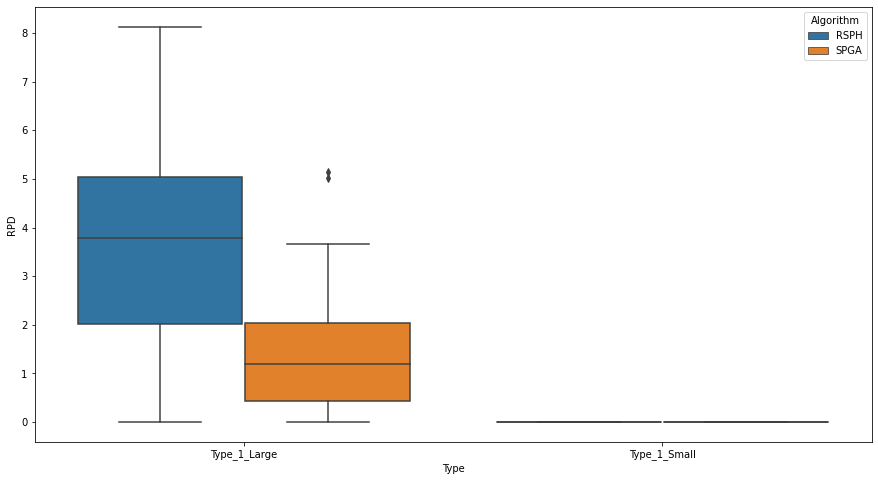

In [54]:
sns.boxplot(x = 'Type', y = 'RPD', data = df[df.Algorithm != "SPMST"], hue = 'Algorithm')